In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

# plt.rc('font', family='Malgun Gothic')
# sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
#         rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
#         style='darkgrid')

In [3]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [4]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [5]:
import warnings
warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data = pd.read_csv('/content/drive/MyDrive/0공모전/한국지능정보사회진흥원_2021년 사이버폭력 실태조사 통계자료(학생)_20211231.csv', encoding='euc-kr')

In [8]:
data

,idx,학교,시도,행정구,행정구역분류,학교급,고등학교유형,학교세부유형,남녀공학구분,지역규모,...,A_5,A_6,A_7,A_8,A_7_etc,B_1,B_2,C,D,WT
0,1,4,서울,마포구,11-11140,초등학교,NaN,초등학교,NaN,특별/광역시,...,5.0,NaN,NaN,NaN,NaN,5,5,5,4,558.306878
1,2,4,서울,마포구,11-11140,초등학교,NaN,초등학교,NaN,특별/광역시,...,NaN,NaN,NaN,NaN,NaN,5,5,4,5,635.757962
2,3,4,서울,마포구,11-11140,초등학교,NaN,초등학교,NaN,특별/광역시,...,5.0,NaN,NaN,NaN,NaN,4,4,6,5,635.757962
3,4,4,서울,마포구,11-11140,초등학교,NaN,초등학교,NaN,특별/광역시,...,5.0,NaN,NaN,NaN,NaN,5,5,5,4,635.757962
4,5,4,서울,마포구,11-11140,초등학교,NaN,초등학교,NaN,특별/광역시,...,5.0,NaN,NaN,NaN,NaN,4,5,4,4,558.306878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,9013,5022,경북,구미시,37-37050,고등학교,특성화고(직업),가사고등학교,남여공학,면지역,...,5.0,NaN,NaN,NaN,NaN,99,5,5,4,437.728571
9013,9014,5022,경북,구미시,37-37050,고등학교,특성화고(직업),가사고등학교,남여공학,면지역,...,5.0,NaN,NaN,NaN,NaN,7,99,4,4,437.728571
9014,9015,5022,경북,구미시,37-37050,고등학교,특성화고(직업),가사고등학교,남여공학,면지역,...,5.0,NaN,NaN,NaN,NaN,5,5,2,4,437.728571
9015,9016,5022,경북,구미시,37-37050,고등학교,특성화고(직업),가사고등학교,남여공학,면지역,...,5.0,NaN,NaN,NaN,NaN,4,4,2,2,437.728571


# 💛 데이터 준비

In [9]:
selected_columns_x = ['시도', '행정구', '학교급', '학교세부유형', '남녀공학구분', '지역규모', 'SQ5', 'Q1', 'Q2_1' ,'Q3' ,'Q4_1' ,'Q4_2' ,'Q4_3' ,'Q4_4' ,'Q4_5' ,'Q4_6' ,'Q4_7' ,'Q4_8'
                    ,'Q6_1' ,'Q6_2','Q6_3','Q6_4','Q6_5','Q6_1a','Q7','Q11_1','Q11_2','Q11_3','Q12_1','Q12_2','Q12_3','Q13_1','Q13_2','Q13_3','Q13_4','Q13_5'
                    ,'Q14_1','Q14_2','Q14_3','Q14_4','Q14_5','Q14_6','Q15','Q16','Q17','Q18_1','Q18_2','Q18_3','Q19_1','Q19_2','Q19_3','Q19_4','Q19_5','Q19_6'
                    ,'Q20_1','Q20_2','Q20_3','Q20_4','Q20_5','Q21_1','Q21_2','Q21_3','Q21_4','Q21_5','Q22_1','Q23_1','Q24'
                    ,'A_1','A_2','A_3','A_4','A_5','A_6','A_7','A_8','B_1','B_2','C','D']

x_data = data.copy()
x_data = x_data.loc[:, selected_columns_x]
x_data.head()

,시도,행정구,학교급,학교세부유형,남녀공학구분,지역규모,SQ5,Q1,Q2_1,Q3,...,A_3,A_4,A_5,A_6,A_7,A_8,B_1,B_2,C,D
0,서울,마포구,초등학교,초등학교,NaN,특별/광역시,1,3,1,4,...,3.0,4.0,5.0,NaN,NaN,NaN,5,5,5,4
1,서울,마포구,초등학교,초등학교,NaN,특별/광역시,2,3,5,1,...,3.0,4.0,NaN,NaN,NaN,NaN,5,5,4,5
2,서울,마포구,초등학교,초등학교,NaN,특별/광역시,2,2,1,5,...,3.0,4.0,5.0,NaN,NaN,NaN,4,4,6,5
3,서울,마포구,초등학교,초등학교,NaN,특별/광역시,2,2,4,4,...,3.0,4.0,5.0,NaN,NaN,NaN,5,5,5,4
4,서울,마포구,초등학교,초등학교,NaN,특별/광역시,1,4,3,4,...,3.0,4.0,5.0,NaN,NaN,NaN,4,5,4,4


In [10]:
x = pd.get_dummies(x_data, columns=selected_columns_x, drop_first=True)
x.head()

,시도_경기,시도_경남,시도_경북,시도_광주,시도_대구,시도_대전,시도_부산,시도_서울,시도_세종,시도_울산,...,C_2,C_3,C_4,C_5,C_6,C_7,D_2,D_3,D_4,D_5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [11]:
selected_columns_y = ['Q9a_1' ,'Q9a_2' ,'Q9a_3' ,'Q9a_4' ,'Q9a_5' ,'Q9a_6' ,'Q9a_7' ,'Q9a_8']
y_data = data.copy()
y_data = y_data.loc[:, selected_columns_y]
y_data.head()

,Q9a_1,Q9a_2,Q9a_3,Q9a_4,Q9a_5,Q9a_6,Q9a_7,Q9a_8
0,9,9,9,9,9,9,9,9
1,9,9,9,9,9,9,9,9
2,9,9,9,9,9,9,9,9
3,9,9,9,9,9,9,9,9
4,9,9,9,9,9,9,9,9


In [12]:
y_data['가해여부'] = 1
y_data.loc[(y_data['Q9a_1']==9) & (y_data['Q9a_2']==9) & (y_data['Q9a_3']==9) & (y_data['Q9a_4']==9) & (y_data['Q9a_5']==9) & (y_data['Q9a_6']==9) & (y_data['Q9a_7']==9) & (y_data['Q9a_8']==9), '가해여부'] = 0
y_data['가해여부'].value_counts()

0    7781
1    1236
Name: 가해여부, dtype: int64

In [13]:
y = y_data.loc[:, '가해여부']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: 가해여부, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6311, 349), (2706, 349), (6311,), (2706,))

# 💛 RandomForestClassifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [16]:
y_pred = model_rf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2315    0]
 [ 307   84]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2315
           1       1.00      0.21      0.35       391

    accuracy                           0.89      2706
   macro avg       0.94      0.61      0.65      2706
weighted avg       0.90      0.89      0.85      2706



In [18]:
# 변수의 특성 중요도 계산하기
def plot_feature_importance(importance, names, result_only = False, topn = 'all'):
    feature_importance = np.array(importance)
    feature_name = np.array(names)

    data={'feature_name':feature_name,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    #변수의 특성 중요도 순으로 정렬하기
    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    #변수의 특성 중요도 그래프로 그리기
    if result_only == False :
        plt.figure(figsize=(10,20))
        sns.barplot(x='feature_importance', y='feature_name', data = fi_df)

        plt.xlabel('importance')
        plt.ylabel('feature name')
        plt.grid()

    return fi_df

,feature_name,feature_importance
0,Q4_1_3,9.364436e-03
1,Q4_1_4,8.479783e-03
2,Q6_1_4,8.274512e-03
3,Q6_1_9,7.759237e-03
4,SQ5_2,7.461083e-03
...,...,...
344,행정구_서초구,2.189894e-05
345,B_2_2,1.025936e-05
346,학교세부유형_농림업고등학교,8.845924e-06
347,행정구_광주시,8.845440e-06


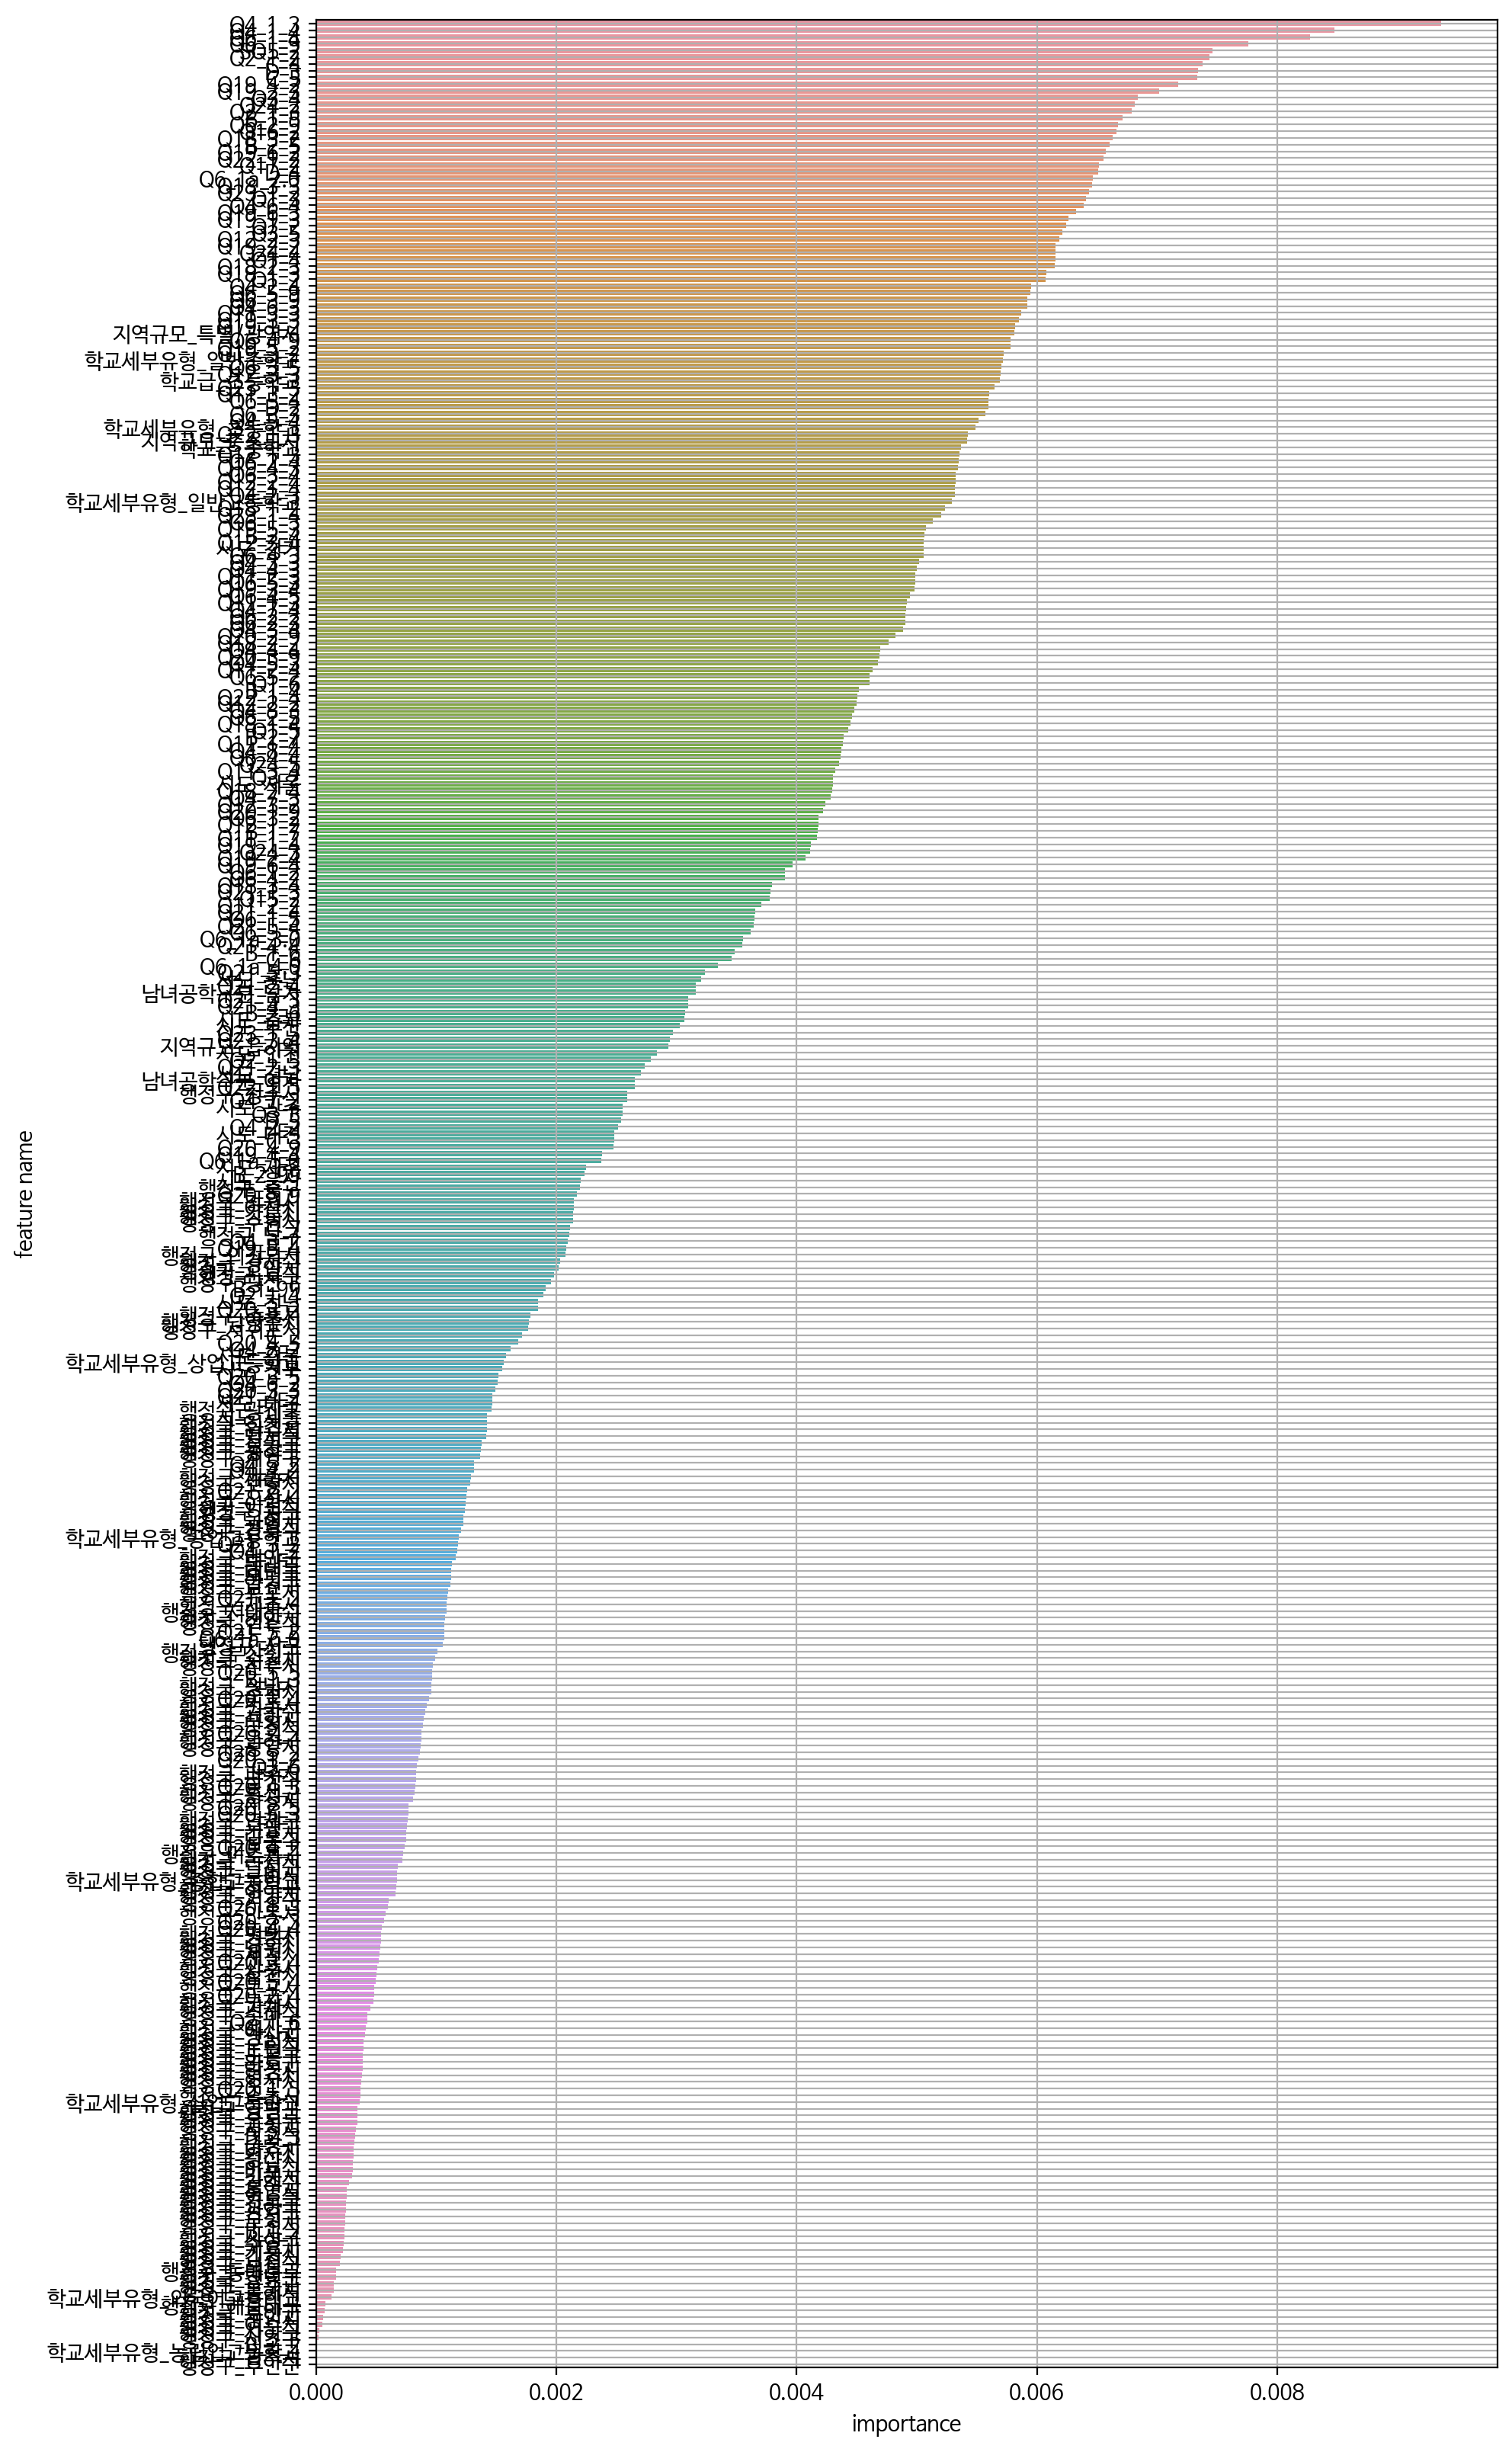

In [19]:
# 변수 중요도 추출
plot_feature_importance(model_rf.feature_importances_, x_train.columns)

In [20]:
importances = plot_feature_importance(model_rf.feature_importances_, x_train.columns, result_only=True)

In [21]:
pd.options.display.max_rows = 100
importances.head(100)

,feature_name,feature_importance
0,Q4_1_3,0.009364
1,Q4_1_4,0.008480
2,Q6_1_4,0.008275
3,Q6_1_9,0.007759
4,SQ5_2,0.007461
5,Q2_1_2,0.007437
6,C_4,0.007377
7,D_3,0.007344
8,C_5,0.007334
9,Q19_4_2,0.007174


# 💛 XGBClassifier

In [22]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

y_pred = model_rf.predict(x_test)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2315    0]
 [ 307   84]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2315
           1       1.00      0.21      0.35       391

    accuracy                           0.89      2706
   macro avg       0.94      0.61      0.65      2706
weighted avg       0.90      0.89      0.85      2706



,feature_name,feature_importance
0,Q6_1_9,0.016250
1,Q4_1_4,0.014312
2,Q20_5_4,0.011959
3,시도_충남,0.010114
4,행정구_홍성군,0.009468
...,...,...
344,행정구_부안군,0.000000
345,행정구_부천시,0.000000
346,행정구_부평구,0.000000
347,행정구_사천시,0.000000


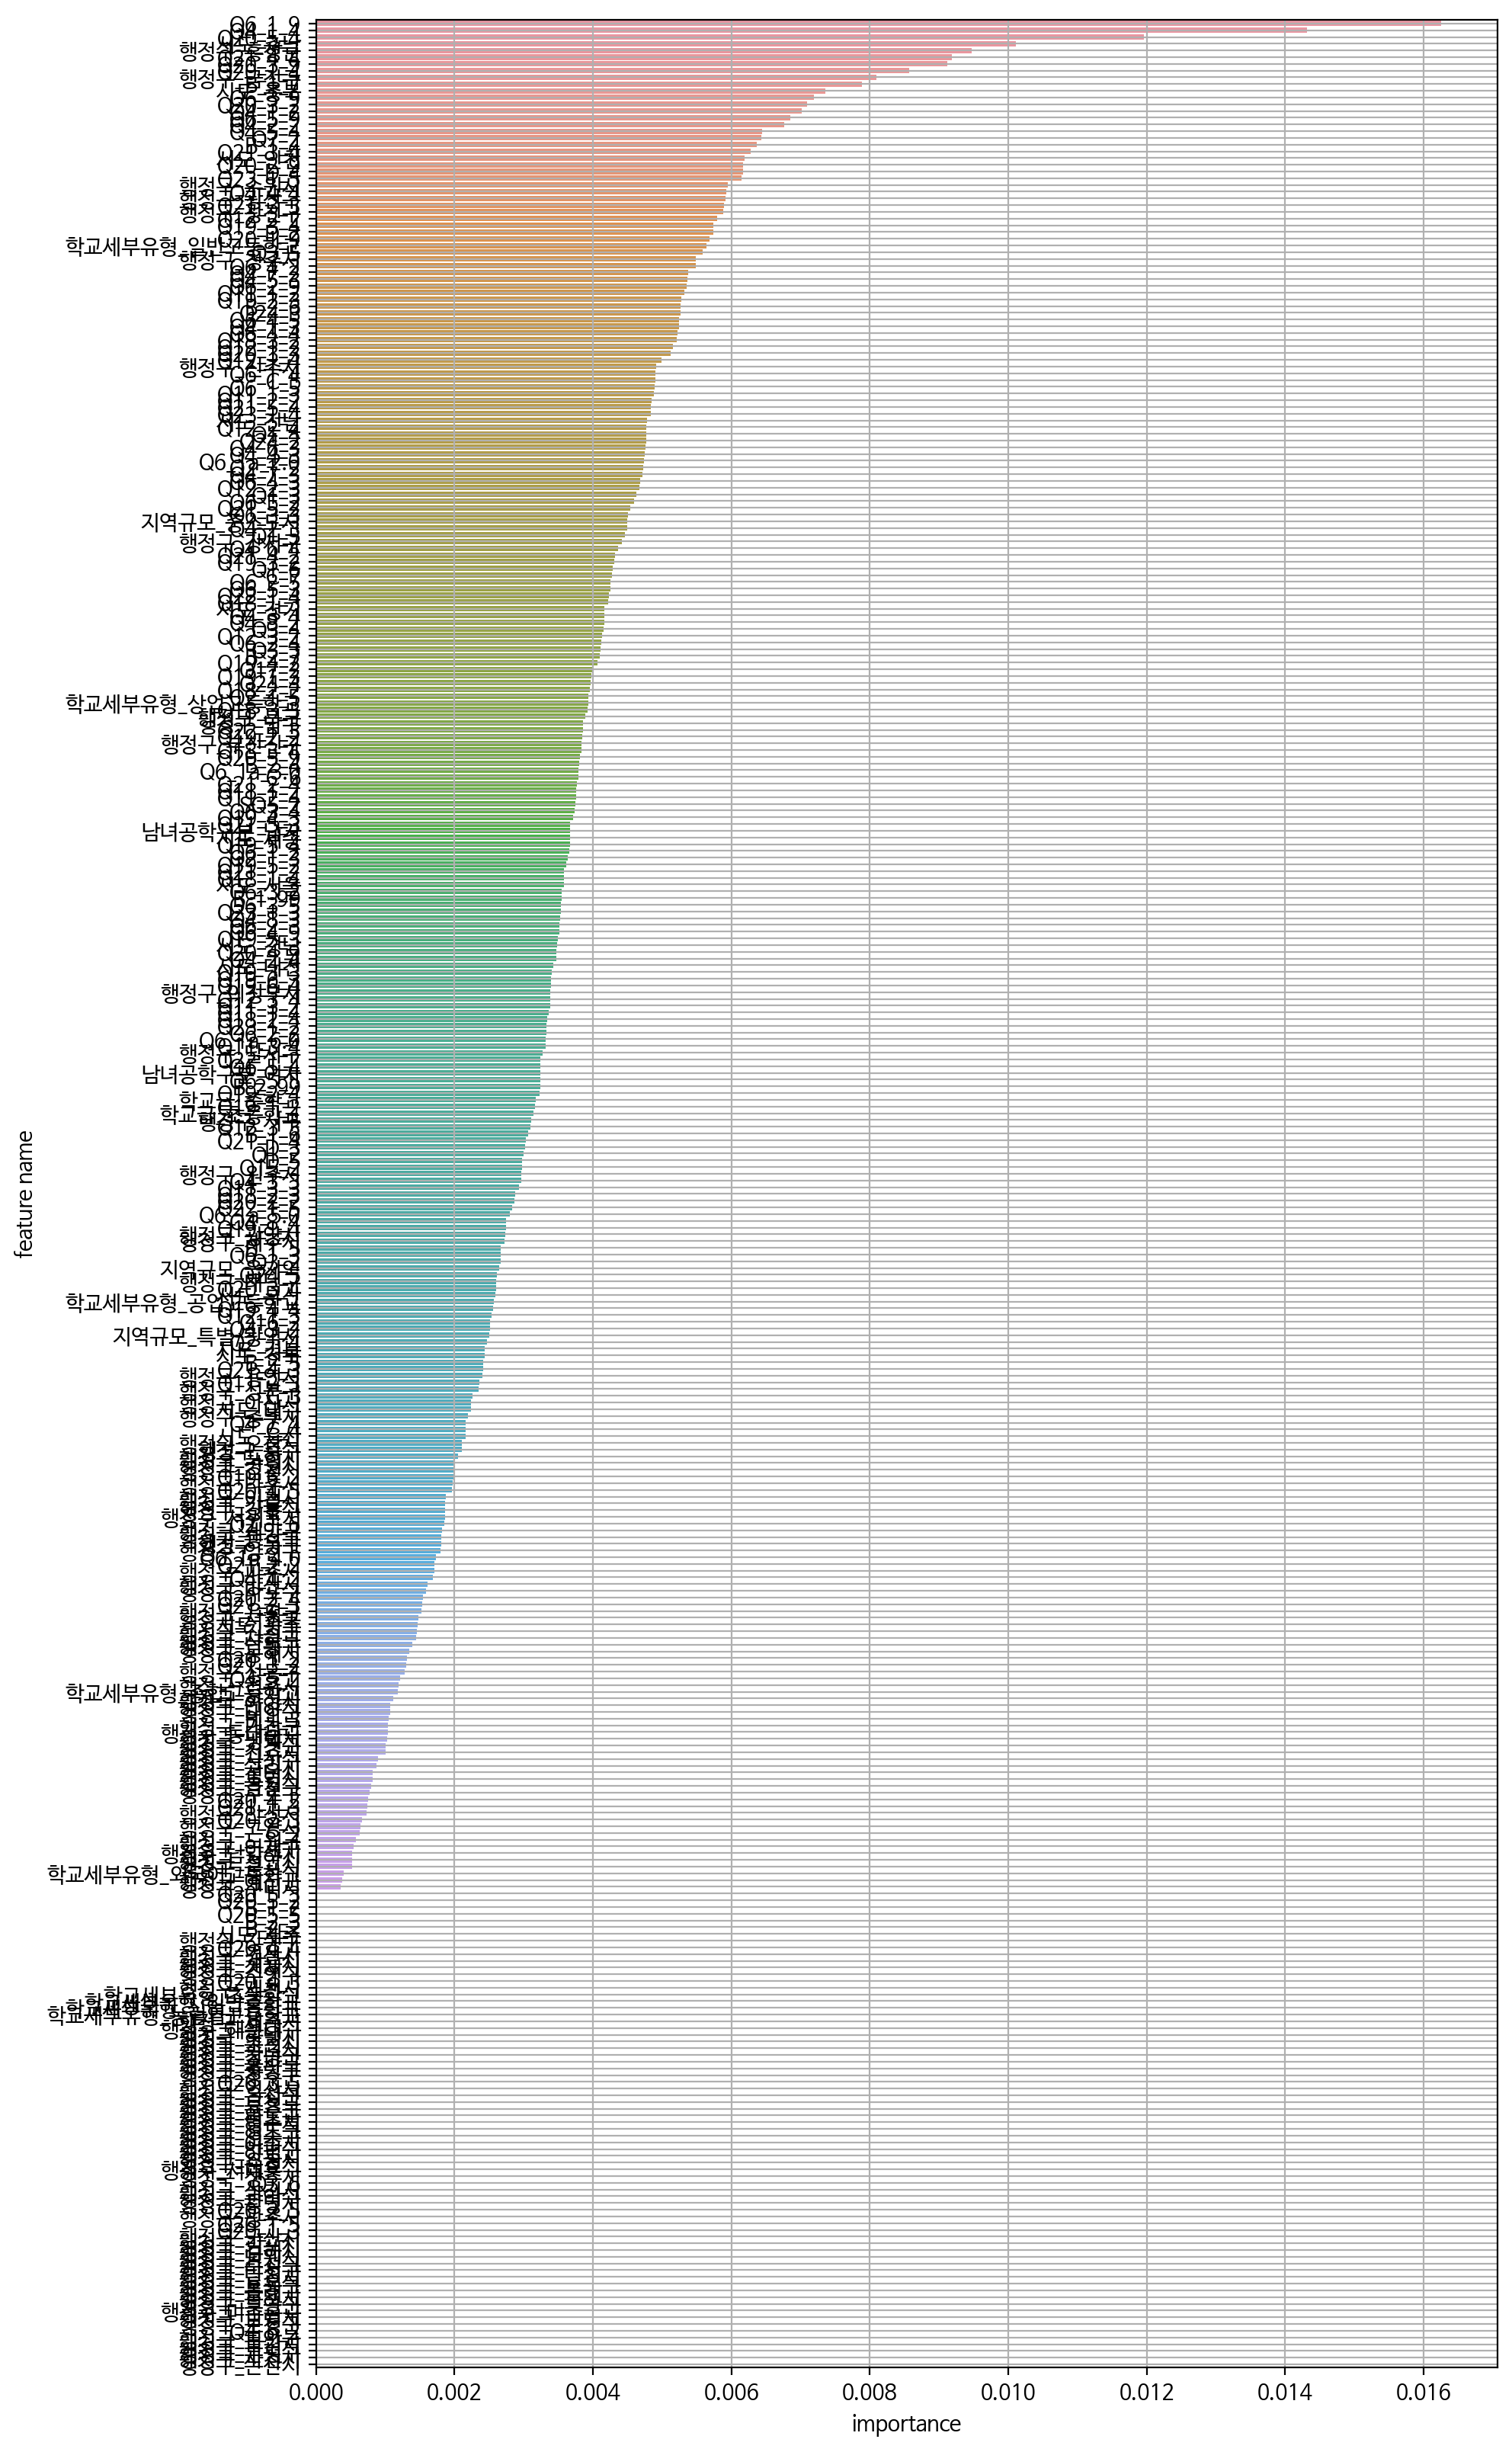

In [23]:
# 변수 중요도 추출
plot_feature_importance(model_xgb.feature_importances_, x_train.columns)

In [24]:
importances = plot_feature_importance(model_xgb.feature_importances_, x_train.columns, result_only=True)
importances.head(100)

,feature_name,feature_importance
0,Q6_1_9,0.016250
1,Q4_1_4,0.014312
2,Q20_5_4,0.011959
3,시도_충남,0.010114
4,행정구_홍성군,0.009468
5,Q21_4_4,0.009182
6,Q20_3_9,0.009118
7,Q20_1_4,0.008564
8,행정구_금정구,0.008089
9,B_1_7,0.007880


## 💡 1에 대한 recall 낮음 (∵ 불균형 데이터)

In [25]:
y.value_counts()

0    7781
1    1236
Name: 가해여부, dtype: int64

In [26]:
x.shape, y.shape

((9017, 349), (9017,))

In [27]:
from imblearn.over_sampling import SMOTE
sampling_strategy = 0.6 #{0: 1200, 1: 1200}
smote = SMOTE(sampling_strategy=sampling_strategy)
x_smote, y_smote = smote.fit_resample(x, y)
x_smote.shape, y_smote.shape

((12449, 349), (12449,))

In [28]:
y_smote.value_counts()

0    7781
1    4668
Name: 가해여부, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8714, 349), (3735, 349), (8714,), (3735,))

# 💛 RandomForestClassifier with SMOTEed Data

In [30]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
y_pred = model_rf.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2333    0]
 [ 272 1130]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      2333
           1       1.00      0.81      0.89      1402

    accuracy                           0.93      3735
   macro avg       0.95      0.90      0.92      3735
weighted avg       0.93      0.93      0.93      3735



,feature_name,feature_importance
0,지역규모_특별/광역시,0.024734
1,Q6_1a_2.0,0.024450
2,지역규모_중소도시,0.023374
3,Q22_1_2,0.022794
4,SQ5_2,0.021931
...,...,...
344,학교세부유형_농림업고등학교,0.000027
345,행정구_부안군,0.000012
346,행정구_해운대구,0.000010
347,행정구_사천시,0.000006


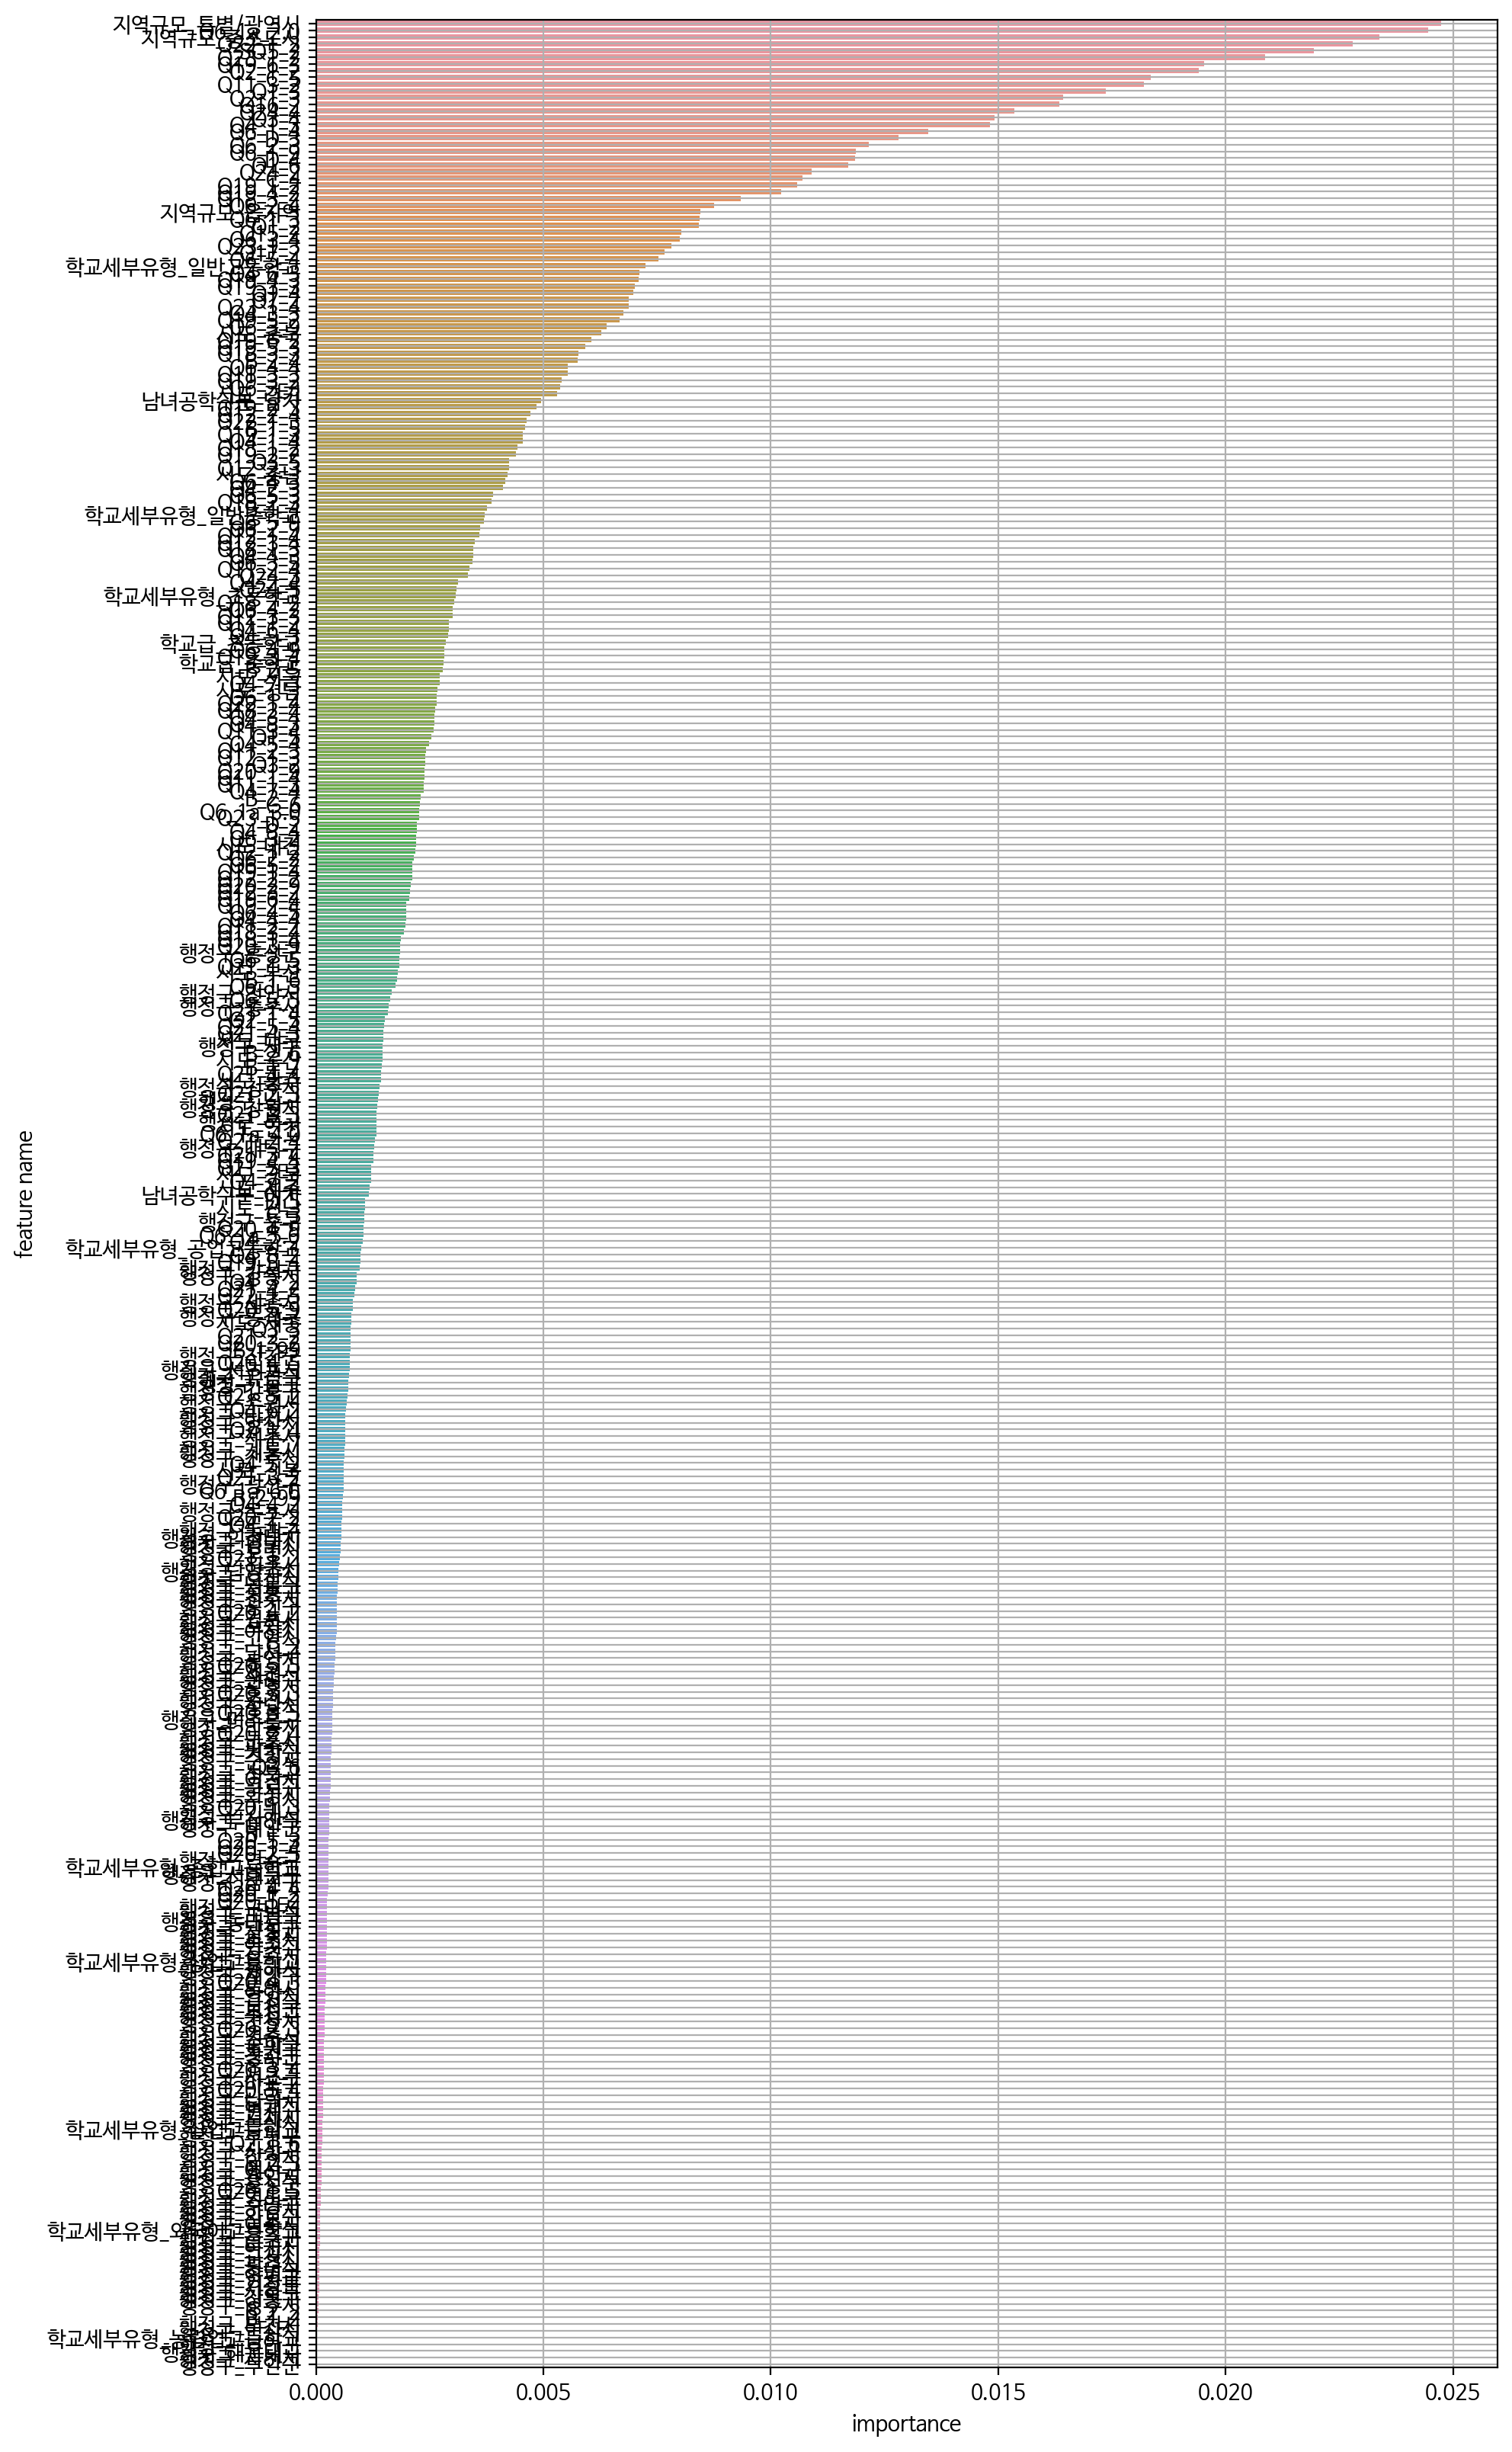

In [31]:
# 변수 중요도 추출
plot_feature_importance(model_rf.feature_importances_, x_train.columns)

In [32]:
importances = plot_feature_importance(model_rf.feature_importances_, x_train.columns, result_only=True)
importances.head(100)

,feature_name,feature_importance
0,지역규모_특별/광역시,0.024734
1,Q6_1a_2.0,0.024450
2,지역규모_중소도시,0.023374
3,Q22_1_2,0.022794
4,SQ5_2,0.021931
5,Q23_1_2,0.020872
6,Q19_6_3,0.019529
7,Q2_1_2,0.019415
8,C_5,0.018352
9,Q11_3_2,0.018208


# 💛 CatBoostClassifer

## 📊 데이터 전처리 for catboost (By 지현님)

In [36]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#data에 데이터 불러온 후 가해학생 컬럼 생성
data = pd.read_csv('/content/drive/MyDrive/0공모전/한국지능정보사회진흥원_2021년 사이버폭력 실태조사 통계자료(학생)_20211231.csv', encoding='euc-kr')
data['violence_exp'] = data.apply(lambda x : 1 if pd.notnull(x['Q9_1']) else 0, axis = 1)

#사용할 컬럼들로 데이터 프레임 구성하기 -> cols_add_Q10에서 Q10 그냥 뺌...
with open('/content/drive/MyDrive/0공모전/cols.txt','r') as f:
    cols = [line.strip() for line in f.readlines()]
df = data[cols]
df.head()

# 영어로 변수명 변경
rename_cols = {
    '시도' : 'city',
    '행정구' : 'district',
    '학교급' : 'school_level',
    '학교세부유형' : 'school_type',
    '남녀공학구분' : 'is_coed',
    '지역규모' : 'area_scale',
}
df.rename(columns = rename_cols, inplace = True)


# 데이터 전처리 for catboost
def preprocess (df):    
    target = 'violence_exp'
    df_p = df.copy()

    # 종속성 있는 + 불필요한 변수 제거
    drop_cols = ['Q6_1a', 'A_7', 'A_8', 'Q13_5', 'Q14_6', 'A_3','A_4'] 
    df_p = df_p.drop(drop_cols, axis=1)
    
    # 남녀공학 결측치 처리
    df_p['is_coed'] = df_p['is_coed'].fillna('남여공학')
    
    #Q13_1~4 , Q14_1~5 -> 결측치는 모두 0으로 처리
    cols_to_fillna = ['Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q14_1', 'Q14_2', 'Q14_3', 'Q14_4', 'Q14_5', 'A_1', 'A_2', 'A_5', 'A_6']
    for col in cols_to_fillna:
        df_p[col] = df_p[col].fillna(0)
    # df_p[cols_to_fillna].head()

    # 9->0, 99->0
    cols_to_change = ['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q20_1', 'Q20_2', 'Q20_3', 'Q20_4', 'Q20_5', 'B_1', 'B_2']
    df_p[cols_to_change] = df_p[cols_to_change].applymap(lambda x : 0 if (x == 9) or (x==99) else x)
    
    # X,Y분리
    y = df_p[target]
    X = df_p.drop(target,axis=1)
    print(X.shape, y.shape)

    # 라벨인코딩
    le_cols = ['city', 'district', 'school_level',	 'school_type',	'is_coed',	'area_scale'] 
    le = LabelEncoder()
    for col in le_cols :
        X[col] = le.fit_transform(X[col])
    
    X = X.astype(int) # Catboost에서는 실수 인식 x. 정수형으로 바꿔주자
    return df_p, X, y


In [37]:
df_p,X,y = preprocess(df)

(9017, 72) (9017,)


In [38]:
# train, test 분리 , 가변수화 안한 데이터 ->for catboost
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1, stratify = y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7213, 72) (1804, 72) (7213,) (1804,)


In [39]:
target = 'violence_exp'

In [40]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.3 MB/s eta 0:00:00


In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.2 MB/s eta 0:00:00


In [ ]:
import optuna
from optuna import Trial
from optuna.samplers import TPESampler

In [ ]:
# train, test 분리 , 가변수화 안한 데이터 ->for catboost
df_b, X,y = preprocess(df)

x_train, x_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=1, stratify=y)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5,random_state=1, stratify=y_val)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9017, 72) (9017,)
(7213, 72) (902, 72) (7213,) (902,)


## 1) Optuna 하이퍼파라미터 조정 => f1_score (average = binary)

In [ ]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.2),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10.0),
        'border_count': trial.suggest_int('border_count', 32, 128),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
        "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
    }
    
    clf = CatBoostClassifier(**params, random_state=1)
    clf.fit(x_train, y_train, eval_set=(x_val, y_val), early_stopping_rounds=50, verbose=False)
    y_pred = clf.predict(x_test)
    f1 = f1_score(y_test, y_pred)
    
    return f1

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)


[I 2023-04-29 02:05:22,472] A new study created in memory with name: no-name-a36b1f5e-35c0-49f5-97e7-857847c5413d
[I 2023-04-29 02:05:30,014] Trial 0 finished with value: 0.2111801242236025 and parameters: {'iterations': 378, 'learning_rate': 0.1126008085015668, 'depth': 6, 'l2_leaf_reg': 6.40250786006679, 'border_count': 120, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.2111801242236025.
[I 2023-04-29 02:06:13,426] Trial 1 finished with value: 0.20253164556962022 and parameters: {'iterations': 637, 'learning_rate': 0.03541926017138859, 'depth': 10, 'l2_leaf_reg': 0.6727442529982848, 'border_count': 110, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian'}. Best is trial 0 with value: 0.2111801242236025.
[I 2023-04-29 02:06:18,745] Trial 2 finished with value: 0.30120481927710846 and parameters: {'iterations': 488, 'learning_rate': 0.02257386304468646, 'depth': 8, 'l2_leaf_reg': 4.20068884732694, 'border_count': 32, 'boosting_type': 'Plain', 

In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.44198895027624313
  Params: 
    iterations: 782
    learning_rate: 0.10092821556795037
    depth: 9
    l2_leaf_reg: 6.212009214713987
    border_count: 39
    boosting_type: Plain
    bootstrap_type: MVS


In [ ]:
cat_features_index = list(range(x_train.shape[1]))

In [ ]:
cb_optuna_model = CatBoostClassifier(
    iterations= 782,
    learning_rate= 0.10092821556795037,
    depth= 9,
    l2_leaf_reg= 6.212009214713987,
    border_count= 39,
    boosting_type= 'Plain',
    bootstrap_type= 'MVS',
)
f1s = []

cb_optuna_model.fit(x_train, y_train verbose=0, eval_set = (x_val, y_val))
y_pred = cb_optuna_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       762
           1       0.79      0.19      0.30       140

    accuracy                           0.87       902
   macro avg       0.83      0.59      0.61       902
weighted avg       0.86      0.87      0.83       902



In [ ]:
cb_optuna_model = CatBoostClassifier(
    iterations= 782,
    learning_rate= 0.10092821556795037,
    depth= 9,
    l2_leaf_reg= 6.212009214713987,
    border_count= 39,
    boosting_type= 'Plain',
    bootstrap_type= 'MVS',
    auto_class_weights = 'Balanced'
)
f1s = []

cb_optuna_model.fit(x_train, y_train, cat_features = cat_features_index, verbose=0, eval_set = (x_val, y_val))
y_pred = cb_optuna_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       762
           1       0.39      0.56      0.46       140

    accuracy                           0.80       902
   macro avg       0.65      0.70      0.67       902
weighted avg       0.83      0.80      0.81       902



## 2) Optuna 하이퍼파라미터 조정 => f1_score (average = micro)

In [ ]:
def objective(trial):
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.5), # 학습률
        "objective": trial.suggest_categorical("objective", ["Logloss"]), # 손실 함수
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1, log='True'), # 각 트리레벨에서 선택되는 feature 비율
        "depth": trial.suggest_int("depth", 1, 12), # 트리 최대 깊이
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10.0), # 정규화 적용하여 과적합 방지
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 0.1, 10), # 불균형한 클래스에 대한 가중치 조절
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]), # 부스팅 방법 결정
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"] # 데이터 샘플링 방법 결정
        ),

        
    }
    
    clf = CatBoostClassifier(**params, random_state=1)
    clf.fit(x_train, y_train, cat_features = cat_features_index, eval_set=(x_val, y_val), early_stopping_rounds=50, verbose=False)
    y_pred = clf.predict(x_test)
    f1 = f1_score(y_test, y_pred, average='micro')
    
    return f1

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)


[I 2023-04-29 02:58:48,435] A new study created in memory with name: no-name-294e1322-7050-4cd9-bcbd-32f14df6c61b
[I 2023-04-29 02:58:51,559] Trial 0 finished with value: 0.49667405764966743 and parameters: {'learning_rate': 0.20533139467874936, 'objective': 'Logloss', 'colsample_bylevel': 0.023306271523189447, 'depth': 7, 'l2_leaf_reg': 0.24629267393835622, 'scale_pos_weight': 9.63115419730278, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian'}. Best is trial 0 with value: 0.49667405764966743.
[I 2023-04-29 02:58:53,950] Trial 1 finished with value: 0.736141906873614 and parameters: {'learning_rate': 0.11594018632612357, 'objective': 'Logloss', 'colsample_bylevel': 0.07366993977365985, 'depth': 8, 'l2_leaf_reg': 0.006176178548957221, 'scale_pos_weight': 6.230230410514991, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian'}. Best is trial 1 with value: 0.736141906873614.
[I 2023-04-29 02:59:09,251] Trial 2 finished with value: 0.7239467849223947 and parameters: {'learning_ra

In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.8924611973392461
  Params: 
    learning_rate: 0.15626417217919153
    objective: Logloss
    colsample_bylevel: 0.041573311042418376
    depth: 12
    l2_leaf_reg: 2.8674708766559225
    scale_pos_weight: 1.5939099901101483
    boosting_type: Plain
    bootstrap_type: Bernoulli


In [ ]:
cb_optuna_model = CatBoostClassifier(
    learning_rate= 0.15626417217919153,
    objective= 'Logloss',
    colsample_bylevel= 0.041573311042418376,
    depth= 12,
    l2_leaf_reg= 2.8674708766559225,
    scale_pos_weight= 1.5939099901101483,
    boosting_type= 'Plain',
    bootstrap_type= 'Bernoulli'
)
f1s = []

cb_optuna_model.fit(x_train, y_train, cat_features = cat_features_index, verbose=0, eval_set = (x_val, y_val))
y_pred = cb_optuna_model.predict(x_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       779
           1       0.88      0.11      0.20       123

    accuracy                           0.88       902
   macro avg       0.88      0.56      0.57       902
weighted avg       0.88      0.88      0.83       902

0.876940133037694


## 3) Optuna 하이퍼파라미터 조정 => f1_score (average = macro)

In [ ]:
def objective(trial):
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.5), # 학습률
        "objective": trial.suggest_categorical("objective", ["Logloss"]), # 손실 함수
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1, log='True'), # 각 트리레벨에서 선택되는 feature 비율
        "depth": trial.suggest_int("depth", 4, 12), # 트리 최대 깊이
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10.0), # 정규화 적용하여 과적합 방지
        # "scale_pos_weight": trial.suggest_float("scale_pos_weight", 0.1, 10), # 불균형한 클래스에 대한 가중치 조절
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]), # 부스팅 방법 결정
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"] # 데이터 샘플링 방법 결정
        ),

        
    }
    
    clf = CatBoostClassifier(**params, random_state=1)
    clf.fit(x_train, y_train, cat_features = cat_features_index, eval_set=(x_val, y_val), early_stopping_rounds=50, verbose=False)
    y_pred = clf.predict(x_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    return f1

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)


[I 2023-04-29 03:32:07,885] A new study created in memory with name: no-name-d433bc14-434a-4dd0-a966-f630569806fe
[I 2023-04-29 03:32:28,625] Trial 0 finished with value: 0.5901151742485582 and parameters: {'learning_rate': 0.14584502639155258, 'objective': 'Logloss', 'colsample_bylevel': 0.04148712924111211, 'depth': 7, 'l2_leaf_reg': 5.974740856493959, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli'}. Best is trial 0 with value: 0.5901151742485582.
[I 2023-04-29 03:32:33,238] Trial 1 finished with value: 0.5566515821765732 and parameters: {'learning_rate': 0.08814357355420444, 'objective': 'Logloss', 'colsample_bylevel': 0.031648899407730746, 'depth': 8, 'l2_leaf_reg': 0.028975435108098184, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian'}. Best is trial 0 with value: 0.5901151742485582.
[I 2023-04-29 03:32:35,605] Trial 2 finished with value: 0.5063031189382561 and parameters: {'learning_rate': 0.18945099608598528, 'objective': 'Logloss', 'colsample_bylevel': 0.01013

In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.67964319227764
  Params: 
    learning_rate: 0.4724771748183283
    objective: Logloss
    colsample_bylevel: 0.051678622649824466
    depth: 12
    l2_leaf_reg: 3.553770186606578
    boosting_type: Plain
    bootstrap_type: MVS


In [ ]:
cb_optuna_model = CatBoostClassifier(
    learning_rate= 0.4724771748183283,
    objective= 'Logloss',
    colsample_bylevel= 0.051678622649824466,
    depth= 12,
    l2_leaf_reg= 3.553770186606578,
    boosting_type= 'Plain',
    bootstrap_type= 'MVS',
    auto_class_weights = 'Balanced'
)
f1s = []

cb_optuna_model.fit(x_train, y_train, cat_features = cat_features_index, verbose=0, eval_set = (x_val, y_val))
y_pred = cb_optuna_model.predict(x_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       779
           1       0.27      0.42      0.33       123

    accuracy                           0.77       902
   macro avg       0.59      0.62      0.60       902
weighted avg       0.81      0.77      0.79       902

0.7682926829268293


In [ ]:
cat_features_index = list(range(x_train.shape[1]))

In [ ]:
TP = confusion_matrix[1, 1]
FN = confusion_matrix[1, 0]
recall = TP / (TP + FN)

## 4) Optuna 하이퍼파라미터 조정 => 1에 대한 recall

In [ ]:
def objective(trial):
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.5), # 학습률
        "objective": trial.suggest_categorical("objective", ["Logloss"]), # 손실 함수
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1), # 각 트리레벨에서 선택되는 feature 비율
        "depth": trial.suggest_int("depth", 5, 15), # 트리 최대 깊이
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10.0), # 정규화 적용하여 과적합 방지
        
    }
    
    clf = CatBoostClassifier(**params, random_state=1, auto_class_weights = 'Balanced')
    clf.fit(x_train, y_train, cat_features = cat_features_index, eval_set=(x_val, y_val), early_stopping_rounds=50, verbose=False)
    y_pred = clf.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    TP = cm[1, 1]
    FN = cm[1, 0]
    recall = TP / (TP + FN)
    
    return recall

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)


[I 2023-04-29 06:00:00,142] A new study created in memory with name: no-name-f3315f03-48fa-4517-b4e5-fb090ad1471b
[I 2023-04-29 06:00:01,641] Trial 0 finished with value: 0.6585365853658537 and parameters: {'learning_rate': 0.09408722843156841, 'objective': 'Logloss', 'colsample_bylevel': 0.014835946723811777, 'depth': 6, 'l2_leaf_reg': 0.06284517145272718}. Best is trial 0 with value: 0.6585365853658537.
[I 2023-04-29 06:00:04,155] Trial 1 finished with value: 0.6829268292682927 and parameters: {'learning_rate': 0.086106836407321, 'objective': 'Logloss', 'colsample_bylevel': 0.06312989141194641, 'depth': 5, 'l2_leaf_reg': 0.0010641644017204503}. Best is trial 1 with value: 0.6829268292682927.
[I 2023-04-29 06:00:06,316] Trial 2 finished with value: 0.6178861788617886 and parameters: {'learning_rate': 0.2072198258347637, 'objective': 'Logloss', 'colsample_bylevel': 0.020956923267487337, 'depth': 13, 'l2_leaf_reg': 0.01914457658594128}. Best is trial 1 with value: 0.6829268292682927.
[I

In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 50
Best trial:
  Value: 0.7235772357723578
  Params: 
    learning_rate: 0.003960571400649565
    objective: Logloss
    colsample_bylevel: 0.037180761684438096
    depth: 5
    l2_leaf_reg: 0.07586719422549065


In [ ]:
cb_optuna_model = CatBoostClassifier(
    learning_rate= 0.003960571400649565,
    objective= 'Logloss',
    colsample_bylevel= 0.037180761684438096,
    depth= 5,
    l2_leaf_reg= 0.07586719422549065,
    auto_class_weights = 'Balanced'
)
f1s = []

cb_optuna_model.fit(x_train, y_train, cat_features = cat_features_index, verbose=0, eval_set = (x_val, y_val))
y_pred = cb_optuna_model.predict(x_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))

              precision    recall  f1-score   support

           0       0.93      0.68      0.78       779
           1       0.25      0.69      0.37       123

    accuracy                           0.68       902
   macro avg       0.59      0.68      0.58       902
weighted avg       0.84      0.68      0.73       902

0.6773835920177383


## 5) Optuna 하이퍼파라미터 조정 => [1에 대한 recall, f1_score (average = macro)]

In [ ]:
def objective(trial):
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.5), # 학습률
        "objective": trial.suggest_categorical("objective", ["Logloss"]), # 손실 함수
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1), # 각 트리레벨에서 선택되는 feature 비율
        "depth": trial.suggest_int("depth", 5, 15), # 트리 최대 깊이
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10.0), # 정규화 적용하여 과적합 방지
        
    }
    
    clf = CatBoostClassifier(**params, random_state=1, auto_class_weights = 'Balanced')
    clf.fit(x_train, y_train, cat_features = cat_features_index, eval_set=(x_val, y_val), early_stopping_rounds=50, verbose=False)
    y_pred = clf.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    TP = cm[1, 1]
    FN = cm[1, 0]
    recall = TP / (TP + FN)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    return recall, f1

study = optuna.create_study(directions=['maximize', 'maximize'])
study.optimize(objective, n_trials=70)


[I 2023-04-29 06:12:07,947] A new study created in memory with name: no-name-07a38d5f-a996-4589-bfd6-649e9b56e314
[I 2023-04-29 06:12:10,035] Trial 0 finished with values: [0.5528455284552846, 0.5367414664981036] and parameters: {'learning_rate': 0.3961617056448628, 'objective': 'Logloss', 'colsample_bylevel': 0.035628893625278935, 'depth': 11, 'l2_leaf_reg': 0.022161020117361287}. 
[I 2023-04-29 06:12:11,380] Trial 1 finished with values: [0.6097560975609756, 0.6092594210495661] and parameters: {'learning_rate': 0.3083067644935983, 'objective': 'Logloss', 'colsample_bylevel': 0.01097374577215467, 'depth': 5, 'l2_leaf_reg': 0.5281029690850263}. 
[I 2023-04-29 06:12:17,366] Trial 2 finished with values: [0.5121951219512195, 0.6976333608957025] and parameters: {'learning_rate': 0.1345240774230811, 'objective': 'Logloss', 'colsample_bylevel': 0.04896924302235909, 'depth': 12, 'l2_leaf_reg': 1.099167261687171}. 
[I 2023-04-29 06:12:18,407] Trial 3 finished with values: [0.6585365853658537,

In [ ]:
print("Number of finished trials: ", len(study.trials))

print("Pareto front:")

trials = sorted(study.best_trials, key=lambda t: t.values[1])

for trial in trials:
    print("  Trial#{}".format(trial.number))
    print(
        "    Values: Values={}, Constraint=".format(
            trial.values#, trial.user_attrs["constraint"][0]
        )
    )
    print("    Params: {}".format(trial.params))

Number of finished trials:  70
Pareto front:
  Trial#67
    Values: Values=[0.8211382113821138, 0.4213295074127212], Constraint=
    Params: {'learning_rate': 0.21260739986439958, 'objective': 'Logloss', 'colsample_bylevel': 0.04980391393969907, 'depth': 14, 'l2_leaf_reg': 0.016816365137395064}
  Trial#21
    Values: Values=[0.7398373983739838, 0.6077320567833254], Constraint=
    Params: {'learning_rate': 0.005308534917533824, 'objective': 'Logloss', 'colsample_bylevel': 0.06904280558140634, 'depth': 6, 'l2_leaf_reg': 0.053142669250360305}
  Trial#62
    Values: Values=[0.6991869918699187, 0.6319046706552828], Constraint=
    Params: {'learning_rate': 0.005308534917533824, 'objective': 'Logloss', 'colsample_bylevel': 0.06904280558140634, 'depth': 7, 'l2_leaf_reg': 0.053142669250360305}
  Trial#16
    Values: Values=[0.6666666666666666, 0.664038736110249], Constraint=
    Params: {'learning_rate': 0.15574878693994174, 'objective': 'Logloss', 'colsample_bylevel': 0.0615041308032919, 'de

In [ ]:
cb_optuna_model = CatBoostClassifier(
    learning_rate= 0.005308534917533824, 
    objective= 'Logloss', 
    colsample_bylevel= 0.06904280558140634, 
    depth= 6, 
    l2_leaf_reg= 0.053142669250360305,
    auto_class_weights = 'Balanced'
)
f1s = []

cb_optuna_model.fit(x_train, y_train, cat_features = cat_features_index, verbose=0, eval_set = (x_val, y_val))
y_pred = cb_optuna_model.predict(x_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))

              precision    recall  f1-score   support

           0       0.94      0.72      0.82       779
           1       0.28      0.69      0.40       123

    accuracy                           0.72       902
   macro avg       0.61      0.71      0.61       902
weighted avg       0.85      0.72      0.76       902

0.7172949002217295
